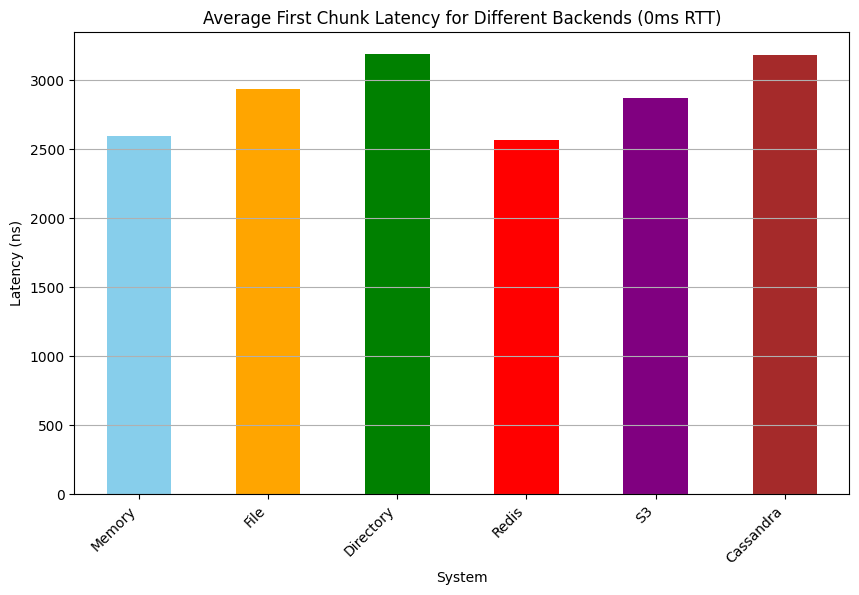

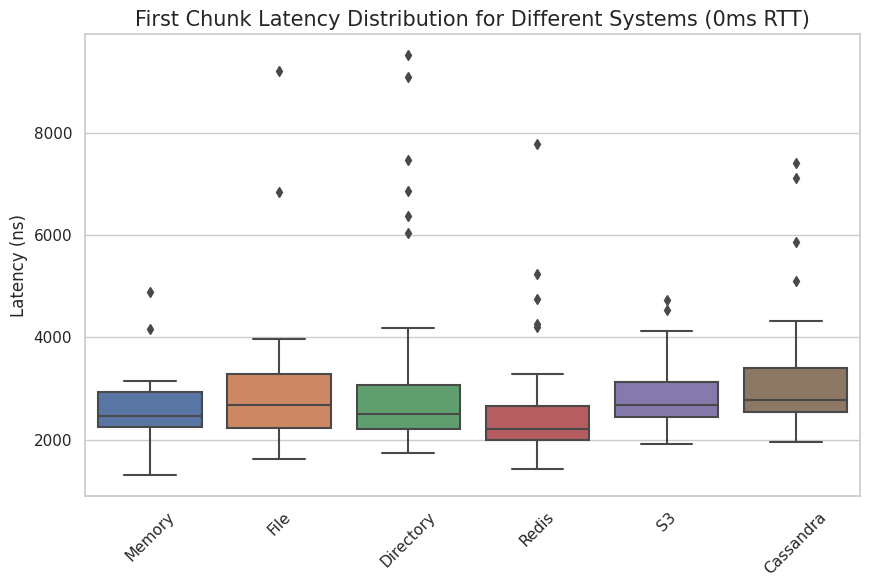

In [6]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data = pd.read_csv('../bench/latency-first-chunk-backendvar/results.csv')

# Calculating the average latency for each backend
average_latencies = data.mean()

# Shortening the backend names by removing the common prefix and suffix
shortened_backend_names = [name.replace("First Chunk Latency for ", "").replace(" (0ms RTT) (ns)", "") for name in average_latencies.index]
average_latencies.index = shortened_backend_names

# Further shortening the backend names by removing the word "Backend"
shortened_backend_names = [name.replace(" Backend", "") for name in average_latencies.index]
average_latencies.index = shortened_backend_names

# Defining a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']

# Visualizing the average latencies with further shortened backend names and different colors for each bar
plt.figure(figsize=(10, 6))
average_latencies.plot(kind='bar', color=colors)
plt.title('Average First Chunk Latency for Different Backends (0ms RTT)')
plt.ylabel('Latency (ns)')
plt.xlabel('System')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


# Rename the columns to only include the system names
data.columns = [col.split(' for ')[1].split(' (')[0].replace(' Backend', '') for col in data.columns]

# Set the theme
sns.set_theme(style="whitegrid")

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(data=data)

# Set the labels for the x-axis
ax.set_xticklabels(data.columns, rotation=45)

# Set the title
ax.set_title('First Chunk Latency Distribution for Different Systems (0ms RTT)', fontsize=15)

# Set the label for the y-axis
ax.set_ylabel('Latency (ns)', fontsize=12)

plt.show()